# Introduction to Deep Learning

## Objectives
In this lab, you will embark on the journey of creating a ANN, DNN model tailored for predicting the total expenditure of potential consumers based on various characteristics. As a vehicle salesperson, your goal is to develop a model that can effectively estimate the overall spending potential.

Your task is to build and train an ANN/DNN model using tensorflow in a Jupyter notebook.

Feel Free to Explore the dataset, analyze its contents, and derive meaningful insights. Additionally, feel empowered to create insightful visualizations that enhance the understanding of the data. 

# Step 1: Import Libraries

In [95]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.calibration import LabelEncoder




# Step 2: Load and Explore the Data

In [96]:
df = pd.read_csv('car_purchasing.csv', encoding='latin-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# Step 3: Data Cleaning and Preprocessing


**Hint: You could use a `StandardScaler()` or `MinMaxScaler()`**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [98]:
df=df.drop(columns={'customer name', 'customer e-mail'}) 

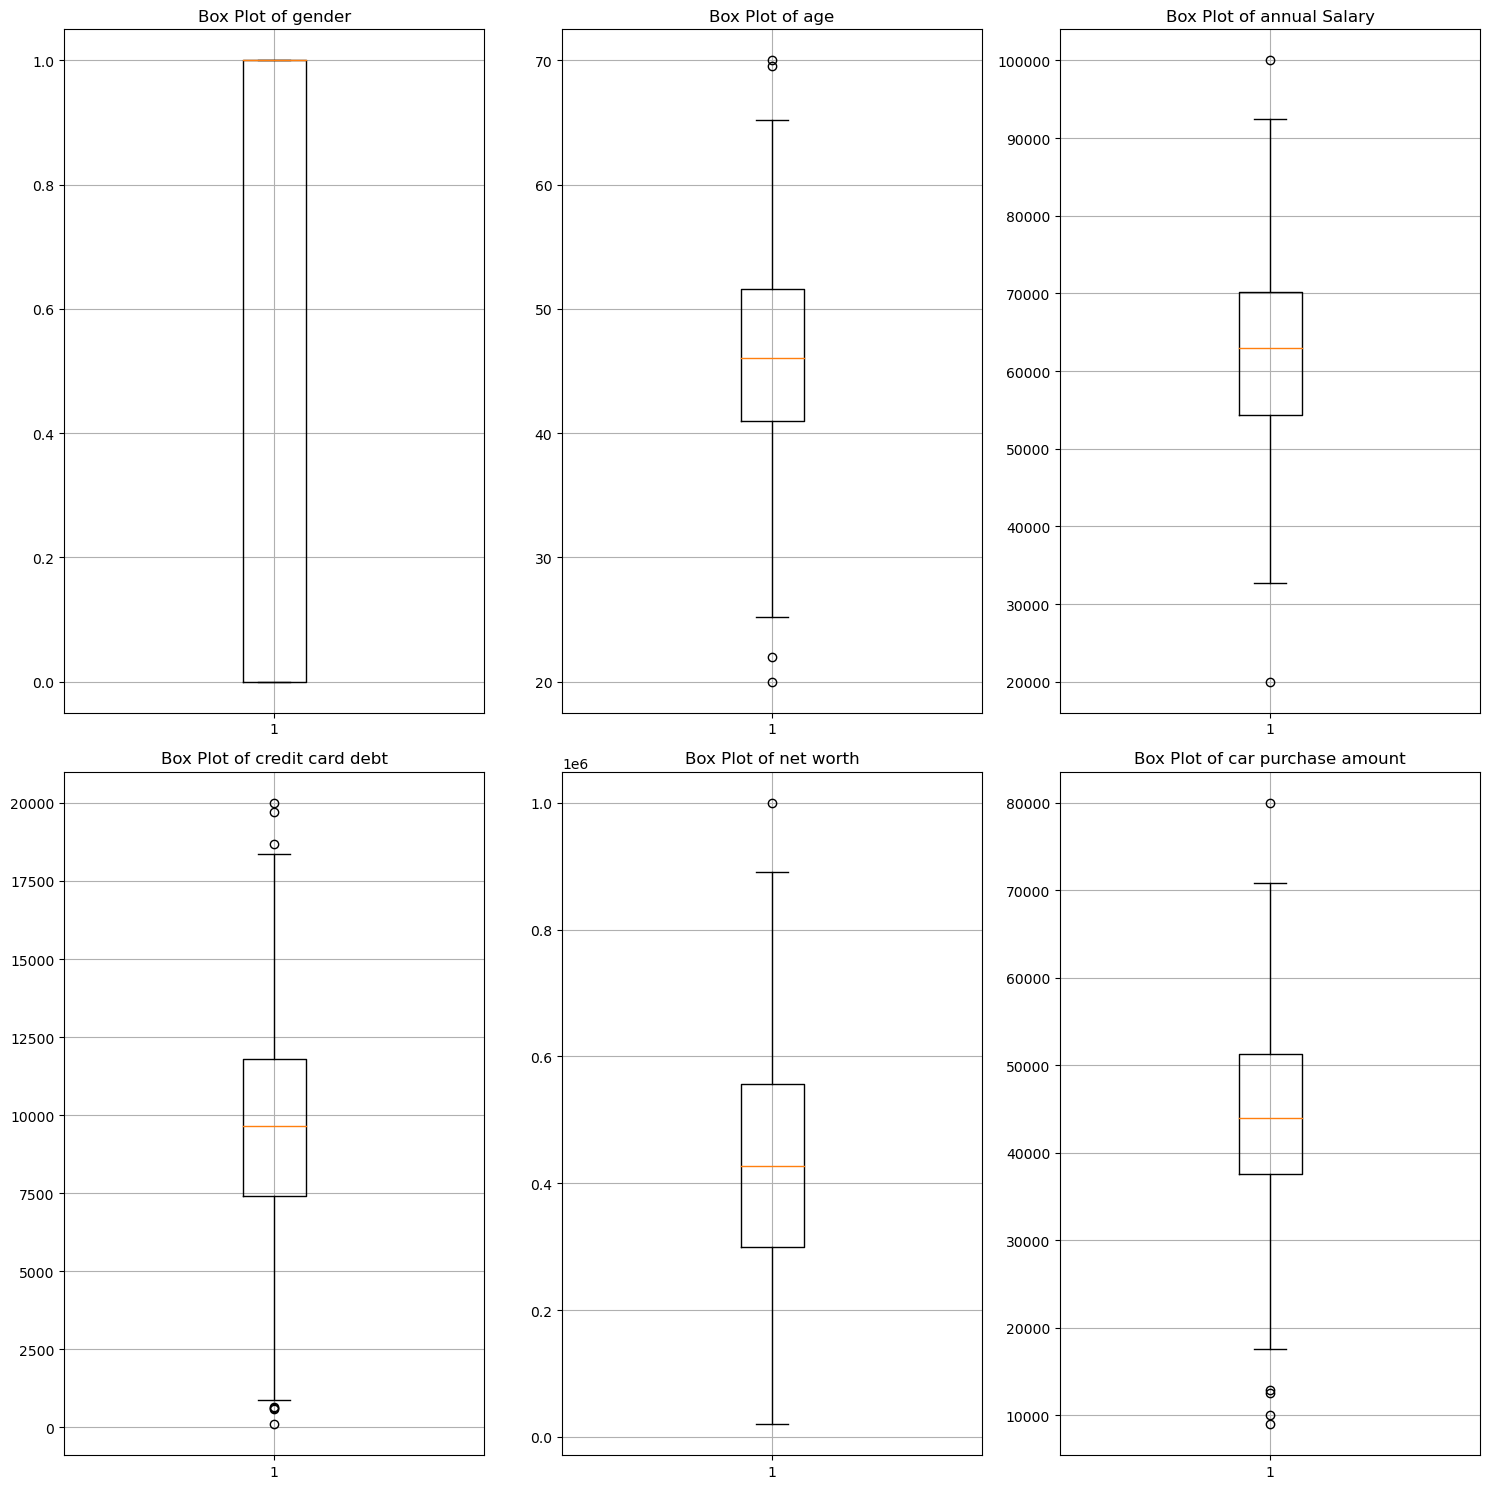

In [99]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))  
for i, column in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    ax = axes[i // 3, i % 3] 
    ax.boxplot(df[column])
    ax.set_title(f'Box Plot of {column}')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [100]:
quantile = QuantileTransformer(output_distribution='uniform')
X = quantile.fit_transform(df[df.columns[2:]])
quantile.transform(X)
df[df.columns[2:]] = pd.DataFrame(X)

In [101]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

scaler = MinMaxScaler()
df[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])

df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,0.284569,0.496994,0.733467,0.140281,0.184369
1,17,0,0.244489,0.637275,0.482966,0.701403,0.545090
2,1,1,0.372745,0.230461,0.673347,0.901804,0.464930
3,41,1,0.933868,0.937876,0.923848,0.731463,0.987976
4,26,1,0.919840,0.402806,0.112224,0.753507,0.859719
...,...,...,...,...,...,...,...
495,128,0,0.270541,0.805611,0.214429,0.715431,0.683367
496,208,1,0.140281,0.302605,0.789579,0.364729,0.126253
497,144,1,0.821643,0.713427,0.605210,0.965932,0.965932
498,24,1,0.945892,0.148297,0.899800,0.314629,0.555110


# Step 4: Train Test Split

In [102]:
y = df['car purchase amount']
X = df.drop(['car purchase amount'], axis=1)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375, 6), (125, 6), (375,), (125,))

# Step 5: Build the Artifical Neural Network Model

In [104]:
ann_model = Sequential()

ann_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
ann_model.add(Dense(16, activation='relu'))

ann_model.add(Dense(1, activation='linear'))

ann_model.compile(optimizer='adam', loss='mean_squared_error')


### Clarify Your Artificial Neural Network (ANN) Model, Optimization, and Loss Function Choices and justify

- **ReLU** is a good choice for hidden layers and commonly used in regression models.
- **linear activation** is best used in the output layer of regression problems.
- **Adam** optimizer is robust and has good performence.
- **MSE** is suitable for regression tasks.

# Step 6: Train the Model


In [105]:
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50


11/11 [==============================] - 1s 31ms/step - loss: 1341.6891 - val_loss: 780.7174
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 467.3455 - val_loss: 185.3667
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 78.1285 - val_loss: 12.1973
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 3.2042 - val_loss: 2.2711
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 4.3151 - val_loss: 3.8458
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 1.9815 - val_loss: 0.2782
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.3833 - val_loss: 0.5546
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4903 - val_loss: 0.2538
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2920 - val_loss: 0.2221
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 0.2993 - val_loss: 0.2068
Epoch 11/50
11/11 

# Step 7: Evaluate the Model

In [106]:
mse = ann_model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

predictions = ann_model.predict(X_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0100
Mean Squared Error on Test Set: 0.010020028799772263
4/4 [==============================] - 0s 3ms/step


# Step 8: Build the Deep Neural Network Model

In [107]:
dnn_model = Sequential()

dnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(16, activation='relu'))

dnn_model.add(Dense(1, activation='linear'))

dnn_model.compile(optimizer='adam', loss='mean_squared_error')

### Clarify Your Deep Neural Network (DNN) Model, Optimization, and Loss Function Choices and justify 

- **ReLU** is a good choice for hidden layers and commonly used in regression models.
- **linear activation** is best used in the output layer of regression problems.
- **Adam** optimizer is robust and has good performence.
- **MSE** is suitable for regression tasks.

# Step 9: Train the Model

In [108]:
dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
11/11 [==============================] - 2s 31ms/step - loss: 1.3403 - val_loss: 0.0920
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1591 - val_loss: 0.0588
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.1148 - val_loss: 0.0532
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 0.1113 - val_loss: 0.1324
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0846 - val_loss: 0.0422
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0859 - val_loss: 0.0753
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0923 - val_loss: 0.0453
Epoch 8/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0494 - val_loss: 0.0425
Epoch 9/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0460 - val_loss: 0.0676
Epoch 10/50
11/11 [==============================] - 0s 7ms/step - loss: 0.0414 - val_loss: 0.0454
Epoch 11/50
11/11

# Step 10: Evaluate the Model

In [109]:
mse = dnn_model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

predictions = dnn_model.predict(X_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0221
Mean Squared Error on Test Set: 0.0221088994294405
4/4 [==============================] - 0s 3ms/step


# Step 11: Evaluate and Compare Scores, Training Time, and Prediction Time of ANN/DNN Models

In [110]:
import time


def train_and_evaluate(model, X_train, y_train, X_test, y_test):

    model.compile(optimizer='adam', loss='mean_squared_error')

    start_training = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
    end_training = time.time()

    start_eval = time.time()
    mse = model.evaluate(X_test, y_test)
    end_eval = time.time()

    return mse, end_training - start_training, end_eval - start_eval

models = [ann_model, dnn_model]

results = []
for idx, model in enumerate(models, 1):
    print(f"Model {idx}")
    mse, train_time, eval_time = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    print(f"Mean Squared Error: {mse}")
    print(f"Training Time: {train_time} seconds")
    print(f"Evaluation Time: {eval_time} seconds")
    print("---------------------------------------")
    results.append((idx, mse, train_time, eval_time))


Model 1
4/4 [==============================] - 0s 3ms/step - loss: 0.0074
Mean Squared Error: 0.00743161840364337
Training Time: 4.847782135009766 seconds
Evaluation Time: 0.12200236320495605 seconds
---------------------------------------
Model 2
4/4 [==============================] - 0s 3ms/step - loss: 0.0055
Mean Squared Error: 0.005464129615575075
Training Time: 5.323846340179443 seconds
Evaluation Time: 0.1241769790649414 seconds
---------------------------------------
